# Kobe Bryant Shot Selection

## __1.Preparation__

#### Load libraries

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns

#### __Load dataset__

In [40]:
data = pd.read_csv('~/github/Kobe_Bryant/data.csv')

data.csv is downloaded from Kaggle 
Link: https://www.kaggle.com/c/kobe-bryant-shot-selection/data

In [41]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [48]:
data.dtypes

action_type             object
combined_shot_type      object
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                category
playoffs              category
season                  object
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type               object
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id                  int64
team_name               object
game_date               object
matchup                 object
opponent                object
shot_id                  int64
dtype: object

Some categorical fields are classified as numeric. Change types of some columns.

In [55]:
data['game_event_id']=data['game_event_id'].astype('category')
data['game_id']=data['game_id'].astype('category')
data['period']=data['period'].astype('category')
data['playoffs']=data['playoffs'].astype('category')
data['shot_made_flag']=data['shot_made_flag'].astype('category')
data['team_id']=data['team_id'].astype('category')
data['shot_id']=data['shot_id'].astype('category')



## __2. Summerize data__

Summerize data to have a understanding 

In [56]:
data.shape

(30697, 25)

There are 30697 records and 25 columns.

In [57]:
data.describe(include=[np.number])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


## __3. Visualize data__ 

Visualize data for understanding

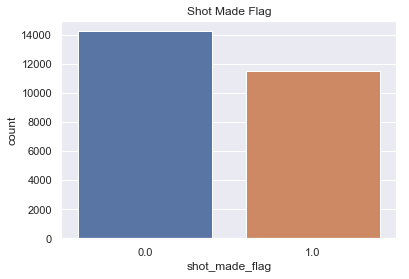

In [70]:
ax=plt.axes()
sns.set(style="darkgrid")
sns.countplot(x='shot_made_flag',data=data,ax=ax)
ax.set_title('Shot Made Flag')
plt.show()


Some columns contain unique information and therefore no predictive power
Need to inspect and delete from dataset before predicting

In [26]:
len(np.unique(data.shot_id))-len(data.shot_id)

0

In [27]:
len(np.unique(data.team_id))

1

In [28]:
len(np.unique(data.team_name))

1

shot_id is unique. Therefore shot_id can be deleted
Thanks to Kobe's loyality, there is only one team_id and one team_name. THerefore these two fields have no predictive power.

In [29]:
del data['shot_id']
del data['team_id']
del data['team_name']

In [34]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR
